# viewmodel

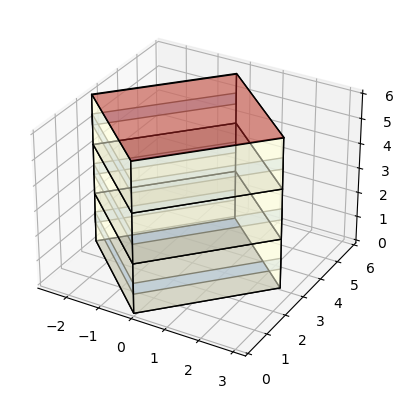

In [1]:
from geomeppy import IDF 
import os
from math import sqrt, radians, cos, sin

# Configuration - Update these paths as needed
idf_config = {
    "iddfile": "D:/EnergyPlus/Energy+.idd",
    "idf_file_path": "D:/output_IDFs/building_1.idf",  # Updated path  D:/output_IDFs\building_0.idf
    "output_dir": "D:/output"
}

# Ensure the output directory exists
os.makedirs(idf_config["output_dir"], exist_ok=True)

# Set the IDD file
IDF.setiddname(idf_config["iddfile"])

# Initialize the IDF object with the correct file path
idf = IDF(idf_config["idf_file_path"])

# View the IDF model
idf.view_model()


Processing IDF file: D:/output_IDFs\building_0.idf


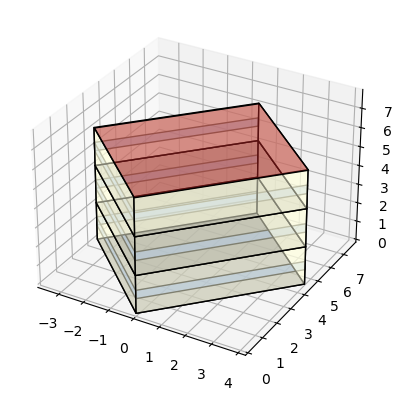

Processing IDF file: D:/output_IDFs\building_0_b973e6.idf


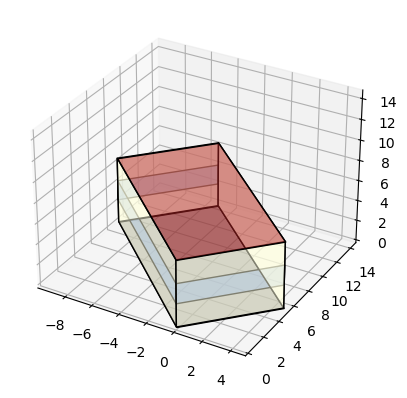

Processing IDF file: D:/output_IDFs\building_1.idf


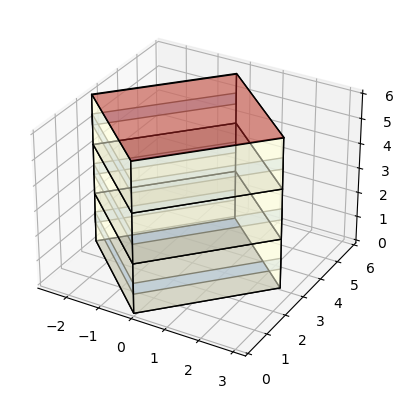

Processing IDF file: D:/output_IDFs\building_1_0a817b.idf


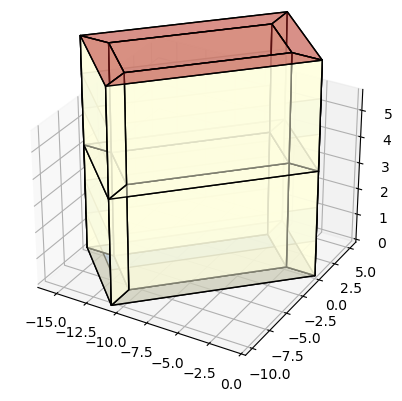

Processing IDF file: D:/output_IDFs\building_1_cfea5b.idf


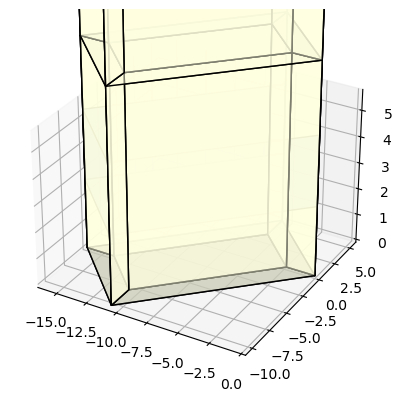

Processing IDF file: D:/output_IDFs\building_2.idf


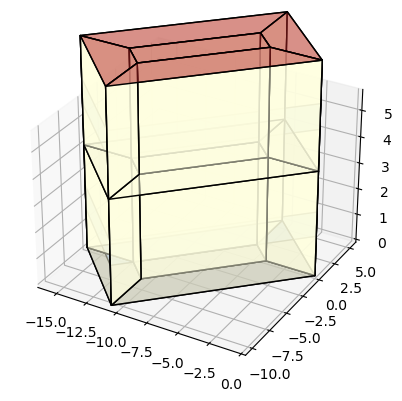

Processing IDF file: D:/output_IDFs\building_3.idf


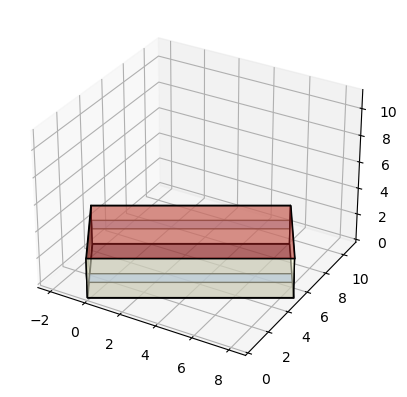

Processing IDF file: D:/output_IDFs\building_4.idf


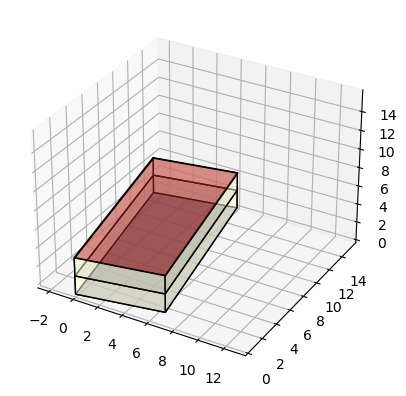

Processing IDF file: D:/output_IDFs\building_5.idf


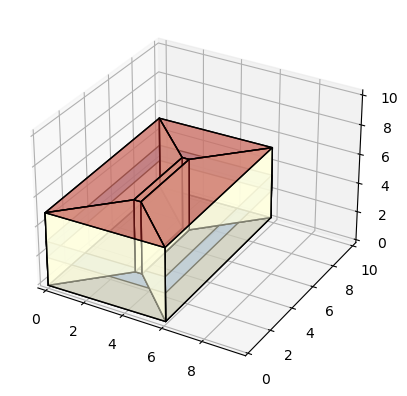

Processing IDF file: D:/output_IDFs\building_6.idf


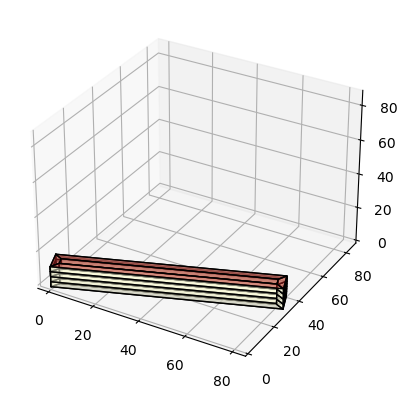

Processing IDF file: D:/output_IDFs\building_7.idf


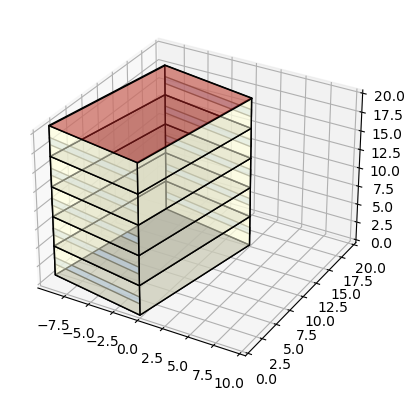

In [2]:
import os
from geomeppy import IDF

# Configuration - Update these paths as needed
idd_file_path = "D:/EnergyPlus/Energy+.idd"
idf_base_directory = "D:/output_IDFs"  # The directory containing all subfolders with .idf files

# Set the IDD file once
IDF.setiddname(idd_file_path)

# Walk through the base directory, including all subdirectories
for root, dirs, files in os.walk(idf_base_directory):
    for file in files:
        # Check if the file has an .idf extension
        if file.lower().endswith(".idf"):
            # Build the full path to the .idf file
            idf_file_path = os.path.join(root, file)
            
            print(f"Processing IDF file: {idf_file_path}")
            
            # Initialize the IDF object
            idf = IDF(idf_file_path)
            
            # View the model
            # Depending on your environment, this may open a window or produce a plot inline (e.g., in a notebook).
            idf.view_model()

            # If you want to do something else (like save images or process objects), 
            # you can add that logic here as well.


In [11]:
import os
from pathlib import Path

# 1) Force a non-interactive matplotlib backend
import matplotlib
matplotlib.use("Agg")

import matplotlib.pyplot as plt
from geomeppy import IDF

idd_file_path = r"D:/EnergyPlus/Energy+.idd"
idf_base_directory = r"D:/output_IDFs"
output_dir = r"D:/figures"

Path(output_dir).mkdir(parents=True, exist_ok=True)

IDF.setiddname(idd_file_path)

for root, dirs, files in os.walk(idf_base_directory):
    for file in files:
        if file.lower().endswith(".idf"):
            # Build file paths
            idf_file_path = os.path.join(root, file)
            print(f"Processing IDF file: {idf_file_path}")

            # Create IDF
            idf = IDF(idf_file_path)

            # 2) Draw geometry. Older geomeppy just shows a figure at this call
            #    but we’re using Agg, so nothing will actually pop up.
            idf.view_model()

            # 3) Grab the figure from matplotlib
            fig = plt.gcf()

            # 4) Save the figure
            stem = Path(file).stem
            out_path = os.path.join(output_dir, f"{stem}.png")
            fig.savefig(out_path, dpi=150, bbox_inches="tight")
            print(f"Saved figure to {out_path}")

            # 5) Close the figure to free memory
            plt.close(fig)


Processing IDF file: D:/output_IDFs\building_0.idf
Saved figure to D:/figures\building_0.png
Processing IDF file: D:/output_IDFs\building_0_b973e6.idf
Saved figure to D:/figures\building_0_b973e6.png
Processing IDF file: D:/output_IDFs\building_1.idf
Saved figure to D:/figures\building_1.png
Processing IDF file: D:/output_IDFs\building_1_0a817b.idf
Saved figure to D:/figures\building_1_0a817b.png
Processing IDF file: D:/output_IDFs\building_1_cfea5b.idf
Saved figure to D:/figures\building_1_cfea5b.png
Processing IDF file: D:/output_IDFs\building_2.idf
Saved figure to D:/figures\building_2.png
Processing IDF file: D:/output_IDFs\building_3.idf
Saved figure to D:/figures\building_3.png
Processing IDF file: D:/output_IDFs\building_4.idf
Saved figure to D:/figures\building_4.png
Processing IDF file: D:/output_IDFs\building_5.idf
Saved figure to D:/figures\building_5.png
Processing IDF file: D:/output_IDFs\building_6.idf
Saved figure to D:/figures\building_6.png
Processing IDF file: D:/outp

In [10]:
import os
from pathlib import Path
import math

import matplotlib
# Use a non-interactive backend so windows don't pop up
matplotlib.use("Agg")

import matplotlib.pyplot as plt
from geomeppy import IDF
from PIL import Image  # to combine images

# -----------------------------
# Configuration
# -----------------------------
IDD_FILE = r"D:/EnergyPlus/Energy+.idd"
IDF_BASE_DIRECTORY = r"D:/output_IDFs"
OUTPUT_DIR = r"D:/figures"

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
IDF.setiddname(IDD_FILE)

# -----------------------------
# Collect all .idf files
# -----------------------------
idf_files = []
for root, dirs, files in os.walk(IDF_BASE_DIRECTORY):
    for file in files:
        if file.lower().endswith(".idf"):
            idf_files.append(os.path.join(root, file))

idf_files.sort()

# -----------------------------
# Helper: chunk list into sets of 4
# -----------------------------
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# -----------------------------
# Generate figures in groups of 4
# -----------------------------
for group_index, chunk in enumerate(chunk_list(idf_files, 4)):
    temp_img_paths = []

    # 1) Generate a separate figure for each IDF
    for i, idf_path in enumerate(chunk):
        # Load IDF
        idf_obj = IDF(idf_path)
        
        # Draw geometry, which by default goes to the "current figure"
        idf_obj.view_model()
        
        # Grab the newly-created figure
        fig = plt.gcf()

        # Save it temporarily
        temp_img = os.path.join(OUTPUT_DIR, f"temp_{group_index}_{i}.png")
        fig.savefig(temp_img, dpi=150, bbox_inches="tight")
        plt.close(fig)  # close to free memory
        temp_img_paths.append(temp_img)

    # 2) Combine the 4 separate images into a 2x2 mosaic
    #    (If there are fewer than 4 IDFs in the last group, we only combine what's there)
    images = [Image.open(p) for p in temp_img_paths]

    # Determine the layout (2 columns × 2 rows)
    # We'll figure out the overall width & height
    max_width = max(img.width for img in images)
    max_height = max(img.height for img in images)
    
    # Create a blank "canvas" for the 2x2 arrangement
    n_cols = 2
    n_rows = 2
    mosaic_width = n_cols * max_width
    mosaic_height = n_rows * max_height
    mosaic = Image.new("RGB", (mosaic_width, mosaic_height), (255, 255, 255))

    # Paste each image into the mosaic
    for i, img in enumerate(images):
        col = i % 2
        row = i // 2
        x_offset = col * max_width
        y_offset = row * max_height
        mosaic.paste(img, (x_offset, y_offset))

    # 3) Save the combined 2x2 mosaic
    final_mosaic_path = os.path.join(OUTPUT_DIR, f"mosaic_{group_index}.png")
    mosaic.save(final_mosaic_path)
    print(f"Saved 2×2 mosaic for group {group_index} at: {final_mosaic_path}")

    # 4) Optional: remove the temporary images
    for p in temp_img_paths:
        os.remove(p)


Saved 2×2 mosaic for group 0 at: D:/figures\mosaic_0.png
Saved 2×2 mosaic for group 1 at: D:/figures\mosaic_1.png
Saved 2×2 mosaic for group 2 at: D:/figures\mosaic_2.png


In [12]:
import os
from pathlib import Path

# Use a non-interactive Matplotlib backend to avoid pop-up windows
import matplotlib
matplotlib.use("Agg")

import matplotlib.pyplot as plt
from geomeppy import IDF
from PIL import Image  # to combine the separate images into a mosaic

# -----------------------------------------------------------------------------
#  CONFIGURATION
# -----------------------------------------------------------------------------
IDD_FILE = r"D:/EnergyPlus/Energy+.idd"
IDF_BASE_DIRECTORY = r"D:/output_IDFs"
OUTPUT_DIR = r"D:/figures"

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
IDF.setiddname(IDD_FILE)

# -----------------------------------------------------------------------------
#  COLLECT ALL .IDF FILE PATHS
# -----------------------------------------------------------------------------
idf_files = []
for root, dirs, files in os.walk(IDF_BASE_DIRECTORY):
    for file in files:
        if file.lower().endswith(".idf"):
            idf_files.append(os.path.join(root, file))

# Sort if you want them in a specific order
idf_files.sort()

# -----------------------------------------------------------------------------
#  HELPER: CHUNK LIST INTO GROUPS OF 4
# -----------------------------------------------------------------------------
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

# -----------------------------------------------------------------------------
#  PROCESS IN GROUPS OF 4, THEN STITCH A MOSAIC
# -----------------------------------------------------------------------------
for group_index, four_paths in enumerate(chunk_list(idf_files, 4)):

    # We'll store the temporary .png files here and then stitch them.
    temp_img_paths = []

    # 1) Generate a separate figure for each IDF in the group of 4
    for i, idf_path in enumerate(four_paths):
        idf_obj = IDF(idf_path)
        
        # -- Draw the IDF geometry --
        idf_obj.view_model()   # This call creates a brand-new Matplotlib figure in the background
        fig = plt.gcf()        # Grab a reference to the "current" figure

        # ---------------------------------------------------------------------
        # ADD TITLE OR OTHER TEXT TO THE FIGURE
        # ---------------------------------------------------------------------
        # Example: use the filename as a title
        building_name = Path(idf_path).stem
        plt.title(f"Building: {building_name}", fontsize=12)

        # Example: show number of surfaces or any other attributes
        # (Below is just an example. Adjust to actual IDF properties you want.)
        try:
            num_surfaces = len(idf_obj.idfobjects["BUILDINGSURFACE:DETAILED"])
        except KeyError:
            num_surfaces = 0

        # Place an annotation in the top-left corner of the figure
        # (relative coordinates: x=0.05, y=0.95 in axis-fraction space)
        plt.annotate(
            f"Surfaces: {num_surfaces}",
            xy=(0.05, 0.95),
            xycoords="axes fraction",
            fontsize=10,
            va="top",  # vertical alignment
            color="blue"
        )

        # You can add more lines for additional attributes.

        # ---------------------------------------------------------------------
        # SAVE THIS FIGURE TEMPORARILY
        # ---------------------------------------------------------------------
        temp_img_path = os.path.join(OUTPUT_DIR, f"temp_{group_index}_{i}.png")
        fig.savefig(temp_img_path, dpi=150, bbox_inches="tight")
        plt.close(fig)  # Close to free memory
        temp_img_paths.append(temp_img_path)

    # 2) Combine the 1–4 separate images into a 2×2 mosaic using PIL
    #    (If there's fewer than 4, it will just fill the top-left slots.)
    images = [Image.open(p) for p in temp_img_paths]

    # Determine layout and maximum width/height among these images
    max_width = max(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create a blank "canvas" for a 2×2 arrangement
    # (2 columns, 2 rows = 4 total “slots”)
    mosaic_width = 2 * max_width
    mosaic_height = 2 * max_height
    mosaic = Image.new("RGB", (mosaic_width, mosaic_height), (255, 255, 255))

    # Paste each image into the correct slot
    for i, img in enumerate(images):
        row = i // 2
        col = i % 2
        x_offset = col * max_width
        y_offset = row * max_height
        mosaic.paste(img, (x_offset, y_offset))

    # 3) Save the combined 2×2 mosaic
    final_mosaic_path = os.path.join(OUTPUT_DIR, f"mosaic_{group_index}.png")
    mosaic.save(final_mosaic_path)
    print(f"Saved 2×2 mosaic → {final_mosaic_path}")

    # 4) Remove the temporary images if you like
    for p in temp_img_paths:
        os.remove(p)


Saved 2×2 mosaic → D:/figures\mosaic_0.png
Saved 2×2 mosaic → D:/figures\mosaic_1.png
Saved 2×2 mosaic → D:/figures\mosaic_2.png


In [21]:
import os

def parse_idf_objects(file_path, objects_of_interest):
    """
    Parse an IDF file and extract lines belonging to any of the objects
    in objects_of_interest.

    Returns a dictionary of lists:
      {
        "OBJECT:NAME": [ "object line 1", "object line 2", ...],
        "OBJECT:NAME2": [ ... ],
        ...
      }
    """
    # Initialize dict with each key in objects_of_interest
    extracted_objects = {obj: [] for obj in objects_of_interest}
    
    # Read all lines
    with open(file_path, "r") as f:
        lines = f.readlines()
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        # An IDF line that starts with the object name typically looks like:
        #   OBJECT:NAME, field1, ...
        #
        # We can split by comma (,) to see if the first token is an object name
        if "," in line:
            first_token = line.split(",")[0].strip().upper()
            
            # Check if the first_token is in our objects_of_interest
            if first_token in objects_of_interest:
                # Start collecting lines for this object
                collected_lines = []
                
                while i < len(lines):
                    collected_lines.append(lines[i])
                    # If we encounter a semicolon on a line, we assume it's the end of the object
                    if ";" in lines[i]:
                        break
                    i += 1
                
                # Add to the corresponding object entry
                extracted_objects[first_token].extend(collected_lines)
            
        i += 1

    return extracted_objects


if __name__ == "__main__":
    # Directory containing your IDF files
    folder_path = r"D:\output_IDFs"
    
    # Option A: Hard-code the list of objects we want
    objects_to_extract = [
        "MATERIAL",
        "MATERIAL:NOMASS",
        "WINDOWMATERIAL:GLAZING",
        "CONSTRUCTION",
        "FENESTRATIONSURFACE:DETAILED"
        
        #"BUILDINGSURFACE:DETAILED" ,
        #"ZONECONTROL:THERMOSTAT"
    ]
    
    # Option B: Read objects from a text file (one object per line)
    # with open("objects_list.txt", "r") as obj_file:
    #     objects_to_extract = [line.strip().upper() for line in obj_file]
    
    # Dictionary to merge all extracted objects from all IDFs
    # Initialize an empty list for each object type
    all_extracted_objects = {obj: [] for obj in objects_to_extract}
    
    # Loop through all IDF files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(".idf"):
            file_path = os.path.join(folder_path, file_name)
            
            # Parse the file to get objects
            extracted_from_file = parse_idf_objects(file_path, objects_to_extract)
            
            # Merge into our master dictionary (with a note about which file it came from)
            for obj_name in objects_to_extract:
                if extracted_from_file[obj_name]:
                    all_extracted_objects[obj_name].append(f"! Extracted from: {file_name}\n")
                    all_extracted_objects[obj_name].extend(extracted_from_file[obj_name])
    
    # Write out merged results to a single text file
    output_file = "merged_extracted_objects.txt"
    with open(output_file, "w") as out:
        for obj_name in objects_to_extract:
            out.write(f"## {obj_name} ##\n\n")
            for line in all_extracted_objects[obj_name]:
                out.write(line)
            out.write("\n\n")

    print(f"Done! Extracted objects have been saved to {output_file}.")


Done! Extracted objects have been saved to merged_extracted_objects.txt.
